<a href="https://colab.research.google.com/github/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


## <center> **Developing a Score to Measure Riskiness of Residential Properties Insurance** 

<center><em>Developing a Score to Measure Riskiness of Residential buildings, Homes, Apartments and Condos as part of an insurance policy underwriting. Insurance underwriting is how an insurance company evaluates its risk. In this project, we identify and explore multiple data sources to collect variables that could be used to develop a score that measures the riskiness of residential buildings to aid the insurance underwriting process.</em></center>


<center><img src="https://github.com/kkrusere/Developing-a-Score-to-Measure-Riskiness-of-Residential-Properties-Insurance/blob/main/assets/real-estate-risk.jpg?raw=1" width=600/></center>

***Project Contributors:*** Kuzi Rusere and Umair Shaikh<br>
**MVP streamlit App URL:** https://kkrusere-developing-a-score-to-measure-prototype-mvp-app-acxav4.streamlitapp.com

### **Modeling, Evaluation and Analysis of Clusters** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Reading Data


In [3]:
#we install the Python SQL Toolkit and Object Relational Mapper and the python MySQL connector
!pip install SQLAlchemy
!pip install mysql-connector-python
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.5 MB 1.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.7 MB/s 


In [ ]:
import mysql.connector as connection
from sqlalchemy import create_engine
import config #this holds our credentials for the database 

host= config.host
user= config.user
db_password = config.password
port = config.port
database = config.database

engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

try:
    query = f"SELECT * FROM NYC_crime"
    data = pd.read_sql(query,engine)

except Exception as e:
    print(str(e))

In [37]:
data = pd.read_csv("/content/drive/MyDrive/Capstone Project/Fire_Incident_Dispatch_Data.csv")

In [38]:
data.head()

,STARFIRE_INCIDENT_ID,INCIDENT_DATETIME,ALARM_BOX_BOROUGH,ALARM_BOX_NUMBER,ALARM_BOX_LOCATION,INCIDENT_BOROUGH,ZIPCODE,POLICEPRECINCT,CITYCOUNCILDISTRICT,COMMUNITYDISTRICT,...,FIRST_ACTIVATION_DATETIME,FIRST_ON_SCENE_DATETIME,INCIDENT_CLOSE_DATETIME,VALID_DISPATCH_RSPNS_TIME_INDC,VALID_INCIDENT_RSPNS_TIME_INDC,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,ENGINES_ASSIGNED_QUANTITY,LADDERS_ASSIGNED_QUANTITY,OTHER_UNITS_ASSIGNED_QUANTITY
0,5.001924e+14,01/01/2005 12:07:32 AM,QUEENS,9237,N/SVC RD H. HARDING EXPY & 99 ST,QUEENS,11368.0,110.0,21.0,404.0,...,01/01/2005 12:09:31 AM,01/01/2005 12:13:10 AM,01/01/2005 12:33:42 AM,N,Y,338,236,3,2,2
1,5.001149e+14,01/01/2005 12:14:40 AM,MANHATTAN,1493,BWAY & W125 ST\M.L.KING JR BLVD,MANHATTAN,10027.0,26.0,7.0,109.0,...,01/01/2005 12:15:43 AM,01/01/2005 12:19:06 AM,01/01/2005 12:35:27 AM,N,Y,266,217,2,2,1
2,5.001065e+14,01/01/2005 12:24:58 AM,BROOKLYN,653,LAFAYETTE & CLASSON AVES,BROOKLYN,11238.0,79.0,35.0,303.0,...,01/01/2005 12:25:51 AM,01/01/2005 12:28:44 AM,01/01/2005 12:47:38 AM,N,Y,226,189,3,2,1
3,5.001165e+14,01/01/2005 12:27:19 AM,MANHATTAN,1649,RIVERSIDE DR & 150 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,01/01/2005 12:28:48 AM,01/01/2005 12:31:53 AM,01/01/2005 02:25:27 AM,N,Y,274,200,5,3,5
4,5.001165e+14,01/01/2005 12:27:19 AM,MANHATTAN,1649,RIVERSIDE DR & 150 ST,MANHATTAN,10031.0,30.0,7.0,109.0,...,01/01/2005 12:28:48 AM,01/01/2005 12:31:53 AM,01/01/2005 02:25:27 AM,N,Y,274,200,5,3,5


In [39]:
list(data.columns)

['STARFIRE_INCIDENT_ID',
 'INCIDENT_DATETIME',
 'ALARM_BOX_BOROUGH',
 'ALARM_BOX_NUMBER',
 'ALARM_BOX_LOCATION',
 'INCIDENT_BOROUGH',
 'ZIPCODE',
 'POLICEPRECINCT',
 'CITYCOUNCILDISTRICT',
 'COMMUNITYDISTRICT',
 'COMMUNITYSCHOOLDISTRICT',
 'CONGRESSIONALDISTRICT',
 'ALARM_SOURCE_DESCRIPTION_TX',
 'ALARM_LEVEL_INDEX_DESCRIPTION',
 'HIGHEST_ALARM_LEVEL',
 'INCIDENT_CLASSIFICATION',
 'INCIDENT_CLASSIFICATION_GROUP',
 'DISPATCH_RESPONSE_SECONDS_QY',
 'FIRST_ASSIGNMENT_DATETIME',
 'FIRST_ACTIVATION_DATETIME',
 'FIRST_ON_SCENE_DATETIME',
 'INCIDENT_CLOSE_DATETIME',
 'VALID_DISPATCH_RSPNS_TIME_INDC',
 'VALID_INCIDENT_RSPNS_TIME_INDC',
 'INCIDENT_RESPONSE_SECONDS_QY',
 'INCIDENT_TRAVEL_TM_SECONDS_QY',
 'ENGINES_ASSIGNED_QUANTITY',
 'LADDERS_ASSIGNED_QUANTITY',
 'OTHER_UNITS_ASSIGNED_QUANTITY']

In [40]:

data = data[[
              'INCIDENT_DATETIME',
              'INCIDENT_BOROUGH',
              'ZIPCODE',
              'HIGHEST_ALARM_LEVEL',
              'INCIDENT_CLASSIFICATION',
              'INCIDENT_CLASSIFICATION_GROUP',

              ]]
data.head()

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,01/01/2005 12:07:32 AM,QUEENS,11368.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,01/01/2005 12:14:40 AM,MANHATTAN,10027.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
2,01/01/2005 12:24:58 AM,BROOKLYN,11238.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
3,01/01/2005 12:27:19 AM,MANHATTAN,10031.0,Seventh Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,01/01/2005 12:27:19 AM,MANHATTAN,10031.0,All Hands Working,Multiple Dwelling 'A' - Other fire,Structural Fires


In [41]:
data['INCIDENT_DATETIME'] = pd.to_datetime(data['INCIDENT_DATETIME'], infer_datetime_format=True)
print(f"the last date {np.max(data['INCIDENT_DATETIME'])}")
print(f"the begining  date {np.min(data['INCIDENT_DATETIME'])}")

the last date 2021-08-01 23:59:54
the begining  date 2005-01-01 00:07:32


In [42]:
data[data['ZIPCODE'].isna()]


,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
298,2005-01-04 13:40:31,MANHATTAN,NaN,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires
300,2005-01-04 13:57:05,MANHATTAN,NaN,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires
352,2005-01-05 06:34:01,MANHATTAN,NaN,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
370,2005-01-05 15:31:26,RICHMOND / STATEN ISLAND,NaN,First Alarm,Private Dwelling Fire,Structural Fires
503,2005-01-07 12:05:45,MANHATTAN,NaN,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires
...,...,...,...,...,...,...
385889,2020-06-08 09:50:07,MANHATTAN,NaN,All Hands Working,Multiple Dwelling 'A' - Other fire,Structural Fires
386349,2020-06-17 12:53:06,QUEENS,NaN,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
386557,2020-06-21 12:28:15,BROOKLYN,NaN,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
386707,2020-06-24 11:37:00,QUEENS,NaN,First Alarm,Multiple Dwelling 'B' Fire,Structural Fires


In [14]:
data.head()

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,2005-01-01 00:07:32,QUEENS,11368.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2005-01-01 00:14:40,MANHATTAN,10027.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
2,2005-01-01 00:16:29,MANHATTAN,10022.0,Seventh Alarm,Other Commercial Building Fire,Structural Fires
3,2005-01-01 00:16:29,MANHATTAN,10022.0,All Hands Working,Other Commercial Building Fire,Structural Fires
4,2005-01-01 00:24:58,BROOKLYN,11238.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires


In [43]:
X = data.drop(columns=['INCIDENT_DATETIME', 'ZIPCODE'])

In [52]:
data.dropna(inplace=True)
data.head()

,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,2005-01-01 00:07:32,QUEENS,11368.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,2005-01-01 00:14:40,MANHATTAN,10027.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
2,2005-01-01 00:24:58,BROOKLYN,11238.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
3,2005-01-01 00:27:19,MANHATTAN,10031.0,Seventh Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2005-01-01 00:27:19,MANHATTAN,10031.0,All Hands Working,Multiple Dwelling 'A' - Other fire,Structural Fires


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386662 entries, 0 to 388531
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   INCIDENT_DATETIME              386662 non-null  datetime64[ns]
 1   INCIDENT_BOROUGH               386662 non-null  object        
 2   ZIPCODE                        386662 non-null  float64       
 3   HIGHEST_ALARM_LEVEL            386662 non-null  object        
 4   INCIDENT_CLASSIFICATION        386662 non-null  object        
 5   INCIDENT_CLASSIFICATION_GROUP  386662 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 20.6+ MB


In [54]:
X

,INCIDENT_BOROUGH,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,QUEENS,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,MANHATTAN,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
2,BROOKLYN,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
3,MANHATTAN,Seventh Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,MANHATTAN,All Hands Working,Multiple Dwelling 'A' - Other fire,Structural Fires
...,...,...,...,...
388527,BROOKLYN,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
388528,BROOKLYN,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
388529,BROOKLYN,First Alarm,Private Dwelling Fire,Structural Fires
388530,BRONX,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires


In [47]:
!pip install kmodes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Modeling and Evaluation

In [65]:
from kmodes.kmodes import KModes

We start with creating the crime score. Here, we are trying to cluster the crime data

Choosing the Appropriate Number of Clusters

We are going to look at two methods that are commonly used to evaluate the appropriate number of clusters:

1. The elbow method
2. The silhouette coefficient

In [56]:
knodes_param = {
    "init": "random",
    "n_init": 5,
    "max_iter": 10,
    "random_state": 42,
}
# A list holds the SSE values for each k
cost = []
for k in range(1, 11):
    kmode = KModes(n_clusters=k, **knodes_param, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)




Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 0, cost: 1281129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/10, moves: 0, cost: 1281129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/10, moves: 0, cost: 1281129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/10, moves: 0, cost: 1281129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/10, moves: 0, cost: 1281129.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/10, moves: 31270, cost: 1178794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/10, moves: 91020, cost: 1188627.0
Run 2, iteration: 2/10, moves: 2907, cost: 1188626.0
Run 2, 

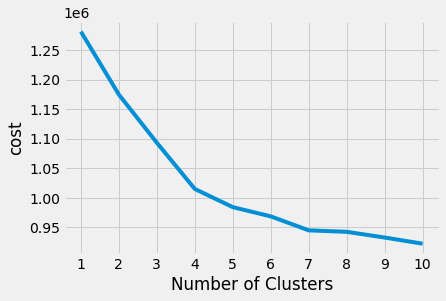

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), cost)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("cost")
plt.show()

In [61]:
kmode.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [63]:
# # A list holds the silhouette coefficients for each k
# silhouette_coefficients = []

# # Notice you start at 2 clusters for silhouette coefficient
# for k in range(2, 11):
#     kmode = KModes(n_clusters=k, **knodes_param, verbose=1)
#     kmode.fit_predict(data)
#     score = silhouette_score(data, kmode.labels_)
#     silhouette_coefficients.append(score)

# plt.style.use("fivethirtyeight")
# plt.plot(range(2, 11), silhouette_coefficients)
# plt.xticks(range(2, 11))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.show()

In [64]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
data.insert(0, "Cluster", clusters, True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 59160, cost: 1026181.0
Run 1, iteration: 2/100, moves: 1744, cost: 1026179.0
Run 1, iteration: 3/100, moves: 0, cost: 1026179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 17609, cost: 1037583.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 20523, cost: 1042357.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 25735, cost: 1063939.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 73524, cost: 1052118.0
Run 5, iteration: 2/100, moves: 9688, cost: 1052116.0
Run 5, iteration: 3/100, moves: 0, cost: 1052116.0
Best run was number 1


In [66]:
data.head()

,Cluster,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,0,2005-01-01 00:07:32,QUEENS,11368.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
1,4,2005-01-01 00:14:40,MANHATTAN,10027.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
2,1,2005-01-01 00:24:58,BROOKLYN,11238.0,First Alarm,Multiple Dwelling 'A' - Compactor fire,Structural Fires
3,2,2005-01-01 00:27:19,MANHATTAN,10031.0,Seventh Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
4,2,2005-01-01 00:27:19,MANHATTAN,10031.0,All Hands Working,Multiple Dwelling 'A' - Other fire,Structural Fires


### Analysis of Clusters 

In [68]:
#let take a look at cluster 0
temp_df = data[data["Cluster"]==0]
temp_df.head()

,Cluster,INCIDENT_DATETIME,INCIDENT_BOROUGH,ZIPCODE,HIGHEST_ALARM_LEVEL,INCIDENT_CLASSIFICATION,INCIDENT_CLASSIFICATION_GROUP
0,0,2005-01-01 00:07:32,QUEENS,11368.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
5,0,2005-01-01 00:46:26,BRONX,10470.0,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
9,0,2005-01-01 02:06:09,BRONX,10457.0,First Alarm,Multiple Dwelling 'A' - Other fire,Structural Fires
10,0,2005-01-01 02:09:59,BRONX,10463.0,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires
14,0,2005-01-01 02:25:30,BRONX,10467.0,First Alarm,Multiple Dwelling 'A' - Food on the stove fire,Structural Fires


In [69]:
#we can look at the distribution the baroughs in cluster 0
temp_df["INCIDENT_BOROUGH"].value_counts()

QUEENS                      73657
BRONX                       72856
RICHMOND / STATEN ISLAND     6513
BROOKLYN                        1
Name: INCIDENT_BOROUGH, dtype: int64